In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm

In [2]:
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
quan=[]
qual=[]
for ColumnName in dataset.columns:
    if(dataset[ColumnName].dtype=='O'):
        qual.append(ColumnName)
    else:
        quan.append(ColumnName)
        

In [5]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(fill_value=0,strategy='constant')
imputer.fit(dataset[quan])
data=imputer.transform(dataset[quan])
data=pd.DataFrame(data,columns=quan)
data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [6]:
data1=pd.DataFrame(dataset,columns=qual)

In [7]:
df=[data1,data]
dataset1=pd.concat(df,axis=1)

In [8]:
dataset1

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4.0,56.00,52.00,52.00,66.0,59.43,0.0
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [9]:
dataset1.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

In [10]:
dataset1.to_csv("Placement_preprocessed.csv",index=False)

NORMAL DISTRIBUTION

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8056\4003058460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['ssc_p'])


<Axes: xlabel='ssc_p', ylabel='Density'>

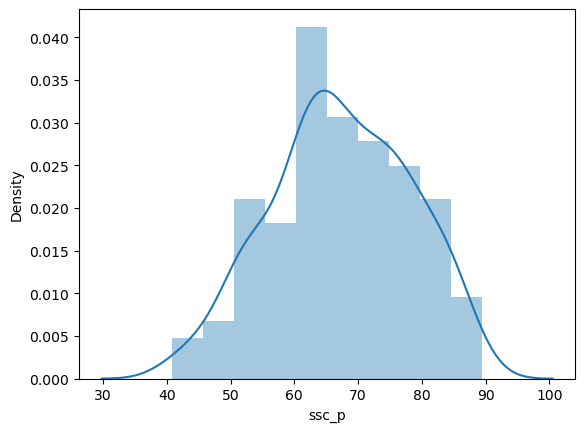

In [13]:
import seaborn as sns
sns.distplot(dataset1['ssc_p'])

PROBABILITY DENSITY FUNCTION

In [12]:
def get_pdf_probability(dataset,startrange,endrange):
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'brown'},color='green')
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')
    sample=dataset
    sample_mean=dataset.mean()
    sample_std=dataset.std()
    norm_dist=norm(sample_mean,sample_std)
    values=[]
    probabilities=[]
    for value in range(startrange,endrange):
        values.append(value)
    for value in values:
        pdf=norm_dist.pdf(value)
        probabilities.append(pdf)
        prob=sum(probabilities)
    print("The probability for the range ({},{}) is {}".format(startrange,endrange,prob))
    return prob
        
        

The probability for the range (60,80) is 0.6346413295441957


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8056\2006683248.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'brown'},color='green')


0.6346413295441957

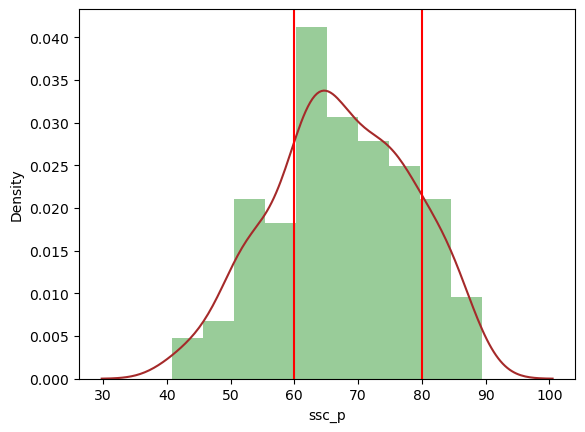

In [14]:
get_pdf_probability(dataset1['ssc_p'],60,80)

CUMMULATIVE DENSITY FUNCTION

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset1['ssc_p'])
ecdf(75)

0.7395348837209302

STANDARD NORMAL DISTRIBUTION

In [16]:
def std_norm_dist(dataset):
    import seaborn as sns
    pyplot.xlabel("z_score")
    mean=dataset.mean()
    sd=dataset.std()
    values=[value for value in dataset]
    z_score=[((x-mean)/sd) for x in values]
    sns.distplot(z_score,kde='True')
    return 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8056\775943433.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde='True')


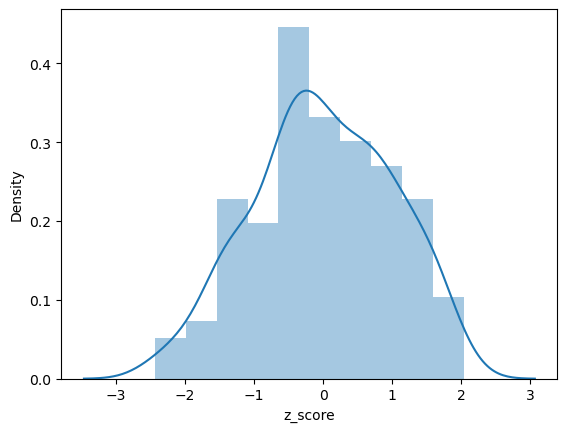

In [17]:
std_norm_dist(dataset['ssc_p'])